# Exemplo

Considere os dados disponíveis em: https://github.com/ageron/handson-ml2/tree/master/datasets/lifesat

1. Cruze os dados dos indicadores *Life satisfaction* e *GDP per capita*
2. Ajuste um modelo de regressão linear a partir dos dados de todos os países exceto o Brasil
3. Faça a predição para o Brasil e compare com o resultado verdadeiro
4. (OPCIONAL) Encontre outros pares de indicadores interessantes para comparar


## Obtendo e manipulando dados

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dados de indicadores da OECD

In [5]:
df = pd.read_csv('https://github.com/ageron/handson-ml2/raw/master/datasets/lifesat/oecd_bli_2015.csv')
df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [7]:
for c in df.columns:
    print(f'{c}: {df[c].unique()}')

LOCATION: ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'EST' 'ISR' 'RUS' 'SVN'
 'OECD']
Country: ['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Japan' 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'United Kingdom' 'United States' 'Brazil' 'Chile'
 'Estonia' 'Israel' 'Russia' 'Slovenia' 'OECD - Total']
INDICATOR: ['HO_BASE' 'HO_HISH' 'HO_NUMR' 'IW_HADI' 'IW_HNFW' 'JE_EMPL' 'JE_JT'
 'JE_LTUR' 'JE_PEARN' 'SC_SNTWS' 'ES_EDUA' 'ES_STCS' 'ES_EDUEX' 'EQ_AIRP'
 'EQ_WATER' 'CG_TRASG' 'CG_VOTO' 'HS_LEB' 'HS_SFRH' 'SW_LIFS' 'PS_SFRV'
 'PS_REPH' 'WL_EWLH' 'WL_TNOW']
Indicator: ['Dwellings without basic facilities' 'Housing expenditure'
 'Rooms per pers

In [8]:
df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [9]:
units = df[['Indicator', 'Unit']].drop_duplicates().set_index('Indicator')['Unit']
units

Indicator
Dwellings without basic facilities                           Percentage
Housing expenditure                                          Percentage
Rooms per person                                                  Ratio
Household net adjusted disposable income                      US Dollar
Household net financial wealth                                US Dollar
Employment rate                                              Percentage
Job security                                                 Percentage
Long-term unemployment rate                                  Percentage
Personal earnings                                             US Dollar
Quality of support network                                   Percentage
Educational attainment                                       Percentage
Student skills                                            Average score
Years in education                                                Years
Air pollution                                Microgram

In [10]:
units['Life satisfaction']

'Average score'

In [11]:
df = df[df['Inequality']=='Total']
df = df.pivot(index='Country', columns='Indicator', values='Value')
df.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


### Dados de *GDP per capita*

In [12]:
gdp = pd.read_csv('https://github.com/ageron/handson-ml2/raw/master/datasets/lifesat/gdp_per_capita.csv', encoding='latin1', delimiter='\t', thousands=',')
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [13]:
gdp[-5:]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0
189,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
gdp = gdp.dropna(axis=0)
gdp[-5:]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
184,Venezuela,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",7744.746,2010.0
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [15]:
gdp = gdp.set_index('Country')
gdp.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [16]:
gdp = gdp.rename(columns={'2015': 'GDP per capita'})
gdp.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [17]:
for c in gdp.columns:
    print(f'{c}: {gdp[c].nunique()}')

Subject Descriptor: 1
Units: 1
Scale: 1
Country/Series-specific Notes: 1
GDP per capita: 187
Estimates Start After: 16


In [18]:
gdp = gdp['GDP per capita']
gdp

Country
Afghanistan              599.994
Albania                 3995.383
Algeria                 4318.135
Angola                  4100.315
Antigua and Barbuda    14414.302
                         ...    
Venezuela               7744.746
Vietnam                 2088.344
Yemen                   1302.940
Zambia                  1350.151
Zimbabwe                1064.350
Name: GDP per capita, Length: 187, dtype: float64

In [19]:
units['GDP per capita'] = 'US Dollar'
units

Indicator
Dwellings without basic facilities                           Percentage
Housing expenditure                                          Percentage
Rooms per person                                                  Ratio
Household net adjusted disposable income                      US Dollar
Household net financial wealth                                US Dollar
Employment rate                                              Percentage
Job security                                                 Percentage
Long-term unemployment rate                                  Percentage
Personal earnings                                             US Dollar
Quality of support network                                   Percentage
Educational attainment                                       Percentage
Student skills                                            Average score
Years in education                                                Years
Air pollution                                Microgram

### Cruzando os dados

In [20]:
df.index

Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'OECD - Total', 'Poland', 'Portugal', 'Russia', 'Slovak Republic',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States'],
      dtype='object', name='Country')

In [21]:
gdp.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=187)

In [22]:
df.index[~df.index.isin(gdp.index)]

Index(['OECD - Total'], dtype='object', name='Country')

In [23]:
df = df.merge(gdp, left_index=True, right_index=True)
df.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4,50961.865
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0,43724.031
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9,40106.632
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3,8669.998
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2,43331.961


## Treinamento e teste do modelo

### Separando os conjuntos de treino e teste

In [24]:
df_test = df[df.index=='Brazil']
df_test

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3,8669.998


In [25]:
df_train = df[df.index!='Brazil']
df_train.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4,50961.865
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0,43724.031
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9,40106.632
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2,43331.961
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5,13340.905


In [26]:
x_train = df_train['GDP per capita'].to_numpy()
x_test = df_test['GDP per capita'].to_numpy()
x_train

array([ 50961.865,  43724.031,  40106.632,  43331.961,  13340.905,
        17256.918,  52114.165,  17288.083,  41973.988,  37675.006,
        40996.511,  18064.288,  12239.894,  50854.583,  51350.744,
        35343.336,  29866.581,  32485.545,  27195.197, 101994.093,
         9009.28 ,  43603.115,  37044.891,  74822.106,  12495.334,
        19121.592,   9054.914,  15991.736,  20732.482,  25864.721,
        49866.266,  80675.308,   9437.372,  43770.688,  55805.204])

In [27]:
y_train = df_train['Life satisfaction'].to_numpy()
y_test = df_test['Life satisfaction'].to_numpy()
y_train

array([7.3, 6.9, 6.9, 7.3, 6.7, 6.5, 7.5, 5.6, 7.4, 6.5, 7. , 4.8, 4.9,
       7.5, 7. , 7.4, 6. , 5.9, 5.8, 6.9, 6.7, 7.3, 7.3, 7.4, 5.8, 5.1,
       6. , 6.1, 5.7, 6.5, 7.2, 7.5, 5.6, 6.8, 7.2])

### Treinando e fazendo predições

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)
y_train_pred = model.predict(x_train.reshape(-1, 1))
y_test_pred = model.predict(x_test.reshape(-1, 1))
print(f'Brazil: GDP per capita = {x_test}, Predicted life satisfaction = {y_test_pred}')

Brazil: GDP per capita = [8669.998], Predicted life satisfaction = [5.88438802]


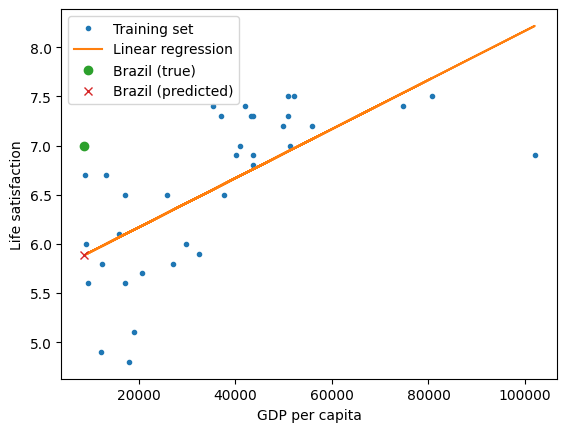

In [29]:
plt.plot(x_train, y_train, '.', label='Training set')
plt.plot(x_train, y_train_pred, label='Linear regression')
plt.plot(x_test, y_test, 'o', label='Brazil (true)')
plt.plot(x_test, y_test_pred, 'x', label='Brazil (predicted)')
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.legend()

In [30]:
df['GDP per capita'].min()

8669.998

### Reorganizando o código

In [31]:
def plot_linear_regression(x, y):
    x_train = df_train[x].to_numpy()
    x_test = df_test[x].to_numpy()

    y_train = df_train[y].to_numpy()
    y_test = df_test[y].to_numpy()

    model = LinearRegression()
    model.fit(x_train.reshape(-1, 1), y_train)
    y_train_pred = model.predict(x_train.reshape(-1, 1))
    y_test_pred = model.predict(x_test.reshape(-1, 1))
    print(f'Brazil: {x} = {x_test}, Predicted {y} = {y_test_pred}')

    plt.plot(x_train, y_train, '.', label='Training set')
    plt.plot(x_train, y_train_pred, label='Linear regression')
    plt.plot(x_test, y_test, 'o', label='Brazil (true)')
    plt.plot(x_test, y_test_pred, 'x', label='Brazil (predicted)')
    plt.xlabel(f'{x} ({units[x]})')
    plt.ylabel(f'{y} ({units[y]})')
    plt.legend()

Brazil: GDP per capita = [8669.998], Predicted Life satisfaction = [5.88438802]


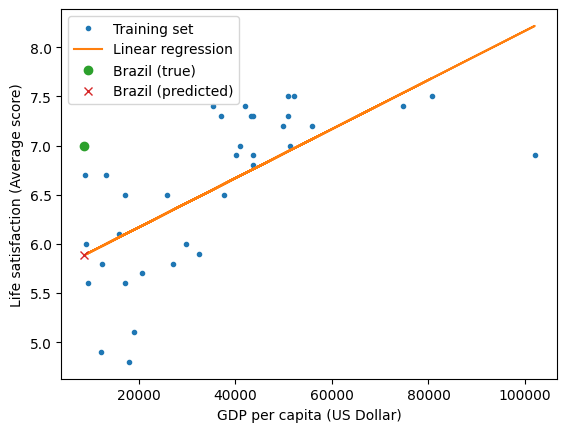

In [32]:
x = 'GDP per capita'
y = 'Life satisfaction'
plot_linear_regression(x, y)

## Explorando outros indicadores

In [33]:
df.corr()['GDP per capita'].sort_values(ascending=False)

GDP per capita                               1.000000
Personal earnings                            0.893302
Household net adjusted disposable income     0.879104
Rooms per person                             0.653897
Water quality                                0.645523
Life satisfaction                            0.635696
Life expectancy                              0.622954
Household net financial wealth               0.599177
Employment rate                              0.557455
Self-reported health                         0.494920
Quality of support network                   0.422329
Voter turnout                                0.385720
Student skills                               0.369334
Educational attainment                       0.306610
Time devoted to leisure and personal care    0.302086
Consultation on rule-making                  0.215890
Years in education                           0.151894
Housing expenditure                          0.028885
Job security                

Brazil: GDP per capita = [8669.998], Predicted Personal earnings = [21999.45765596]


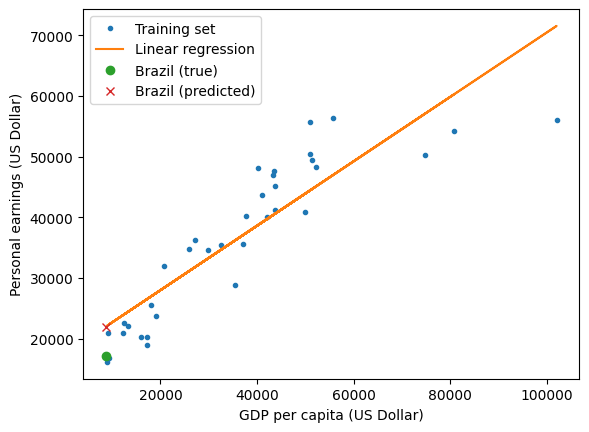

In [34]:
x = 'GDP per capita'
y = 'Personal earnings'
plot_linear_regression(x, y)

In [35]:
df.corr()['Life satisfaction'].sort_values(ascending=False)

Life satisfaction                            1.000000
Employment rate                              0.708582
Personal earnings                            0.661397
GDP per capita                               0.635696
Self-reported health                         0.635645
Rooms per person                             0.595902
Household net adjusted disposable income     0.574658
Water quality                                0.530580
Quality of support network                   0.514655
Household net financial wealth               0.433908
Life expectancy                              0.377952
Voter turnout                                0.367648
Years in education                           0.179730
Educational attainment                       0.172435
Time devoted to leisure and personal care    0.167832
Consultation on rule-making                  0.097025
Housing expenditure                          0.061125
Student skills                               0.059879
Homicide rate               

Brazil: Employment rate = [67.], Predicted Life satisfaction = [6.61765439]


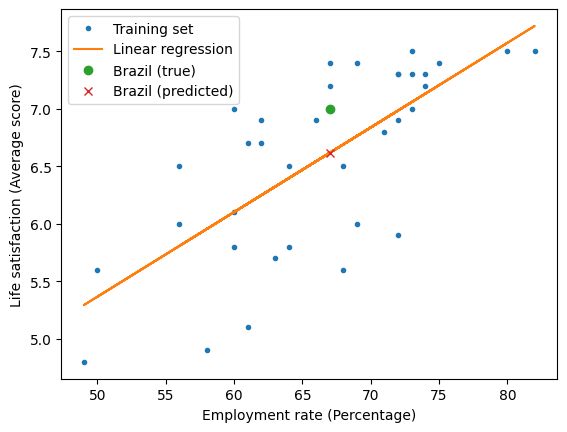

In [36]:
x = 'Employment rate'
y = 'Life satisfaction'
plot_linear_regression(x, y)